In [191]:
import cv2
import numpy as np
import pandas as pd
import os
from tensorflow.keras.layers import Dense,Activation,Dropout,Flatten,BatchNormalization,Dropout,ELU
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import RootMeanSquaredError
from sklearn.metrics import explained_variance_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [192]:
# Load and scale data for training
x = []
y = []
data_path=r"C:\Users\Rohit Varre\Desktop\MliS\Python\SYN data"
categories=os.listdir(data_path)
labels = [i for i in range(len(categories))]
code=dict(zip(categories,labels))                     # Dictionary for label encoding
for folder in categories:
    folder_path=os.path.join(data_path,folder)
    data=os.listdir(folder_path)
    for dat in data:
        dat_path=os.path.join(folder_path,dat)
        inp=pd.read_csv(dat_path)
        inp = inp.iloc[:,1:]
        ref = inp.iloc[0,:]
        inp = inp-ref                                 # Scaling the data with respect to the wrist
        inp = inp[1:]
        x.append(inp)
        inp1 = inp.copy()
        inp1.iloc[:,0] = inp1.iloc[:,0]*-1               # Derving data for the other hand
        x.append(inp1)
        y.append(code[folder])
        y.append(code[folder])

In [193]:
# Reshaping and type casting
x = np.array(x)
y = np.array(y)
x = np.float16(np.reshape(x,(-1,60)))
y = np.reshape(y,(-1,1)).astype(int)
print(x.shape,y.shape)
print(x.min(),x.max())

(12600, 60) (12600, 1)
-0.626 0.508


In [194]:
print(x[0])

[-0.08405  -0.04846  -0.04233  -0.1372   -0.1578   -0.0667   -0.1586
 -0.2603   -0.0979   -0.1776   -0.346    -0.1105   -0.09766  -0.2362
  0.00138  -0.1015   -0.3152   -0.0772   -0.0911   -0.2227   -0.0953
 -0.08685  -0.1852   -0.07764  -0.0477   -0.2391   -0.004974 -0.0526
 -0.3152   -0.1041   -0.04977  -0.201    -0.10767  -0.04538  -0.1779
 -0.06573   0.003195 -0.2317   -0.02934  -0.003712 -0.305    -0.11975
 -0.008606 -0.1982   -0.1063   -0.00549  -0.1665   -0.05704   0.05838
 -0.2151   -0.05807   0.04727  -0.2893   -0.10376   0.03394  -0.2185
 -0.0968    0.036    -0.18     -0.05807 ]


<ipython-input-195-7642b264d048>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x)


<AxesSubplot:ylabel='Density'>

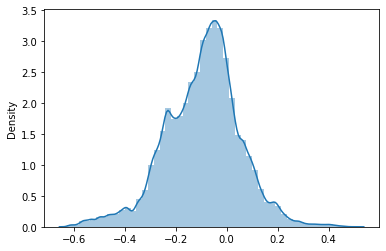

In [195]:
# Distribution Plot
sns.distplot(x)

In [196]:
# from sklearn.preprocessing import MinMaxScaler
# x = StandardScaler().fit_transform(x)
# sns.distplot(x)

In [197]:
# Train test split for training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
output_layer = len(np.unique(y))           # Number of nodes in the output layer
print(output_layer)                

23


In [198]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(10080, 60) (10080, 1) (2520, 60) (2520, 1)


In [199]:
# Model Architecture
model = Sequential([

    Dense(units = 120, input_shape = (60,), activation = 'ELU'),
    Dropout(0.2),
    Dense(units = 60, activation = 'ELU'),
    Dense(units = 30, activation = 'ELU'),
    Dense(units = output_layer, activation = 'softmax'),
])
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 120)               7320      
_________________________________________________________________
dropout_13 (Dropout)         (None, 120)               0         
_________________________________________________________________
dense_53 (Dense)             (None, 60)                7260      
_________________________________________________________________
dense_54 (Dense)             (None, 30)                1830      
_________________________________________________________________
dense_55 (Dense)             (None, 23)                713       
Total params: 17,123
Trainable params: 17,123
Non-trainable params: 0
_________________________________________________________________


In [200]:
# Compiling the model
eps = 30
model.compile(optimizer=Adam(learning_rate=0.01), loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(x=x_train,y=y_train,epochs=eps,verbose=2,validation_split=0.2,batch_size=128)

Epoch 1/30
63/63 - 1s - loss: 0.9588 - accuracy: 0.7101 - val_loss: 0.1628 - val_accuracy: 0.9420
Epoch 2/30
63/63 - 0s - loss: 0.1452 - accuracy: 0.9469 - val_loss: 0.0761 - val_accuracy: 0.9707
Epoch 3/30
63/63 - 0s - loss: 0.1018 - accuracy: 0.9613 - val_loss: 0.0835 - val_accuracy: 0.9673
Epoch 4/30
63/63 - 0s - loss: 0.0786 - accuracy: 0.9694 - val_loss: 0.0426 - val_accuracy: 0.9841
Epoch 5/30
63/63 - 0s - loss: 0.0894 - accuracy: 0.9664 - val_loss: 0.0604 - val_accuracy: 0.9777
Epoch 6/30
63/63 - 0s - loss: 0.0707 - accuracy: 0.9728 - val_loss: 0.0527 - val_accuracy: 0.9807
Epoch 7/30
63/63 - 0s - loss: 0.0567 - accuracy: 0.9783 - val_loss: 0.0581 - val_accuracy: 0.9782
Epoch 8/30
63/63 - 0s - loss: 0.0570 - accuracy: 0.9776 - val_loss: 0.0467 - val_accuracy: 0.9836
Epoch 9/30
63/63 - 0s - loss: 0.0579 - accuracy: 0.9763 - val_loss: 0.0300 - val_accuracy: 0.9866
Epoch 10/30
63/63 - 0s - loss: 0.0576 - accuracy: 0.9787 - val_loss: 0.0356 - val_accuracy: 0.9841
Epoch 11/30
63/63 -

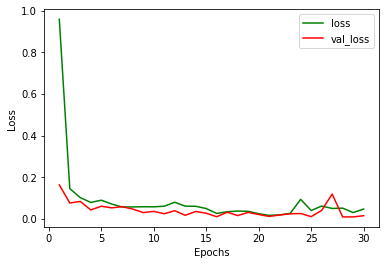

In [201]:
# Loss vs Epochs plot
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,eps+1)
plt.plot(epochs, loss, 'g', label='loss')
plt.plot(epochs, val_loss, 'r', label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [202]:
# Confusion Matrix and accuracy for training and testing data
predictions=model.predict(x=x_test,verbose=0)
predictions1 = model.predict(x=x_train,verbose=0)
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score
from sklearn.metrics import accuracy_score
print("Testing data")
cm=confusion_matrix(y_true=y_test,y_pred=predictions.argmax(axis=1))
print(cm)
print(accuracy_score(y_test,y_pred=predictions.argmax(axis=1)))
print("Training data")
cm1=confusion_matrix(y_true=y_train,y_pred=predictions1.argmax(axis=1))
print(cm1)
print(accuracy_score(y_train,y_pred=predictions1.argmax(axis=1)))

Testing data
[[ 44   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0  30   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0  48   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0 143   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0 109   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0 114   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   0 121   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   0   0 121   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 106   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 114   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0

In [203]:
print(categories,len(categories))

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w'] 23


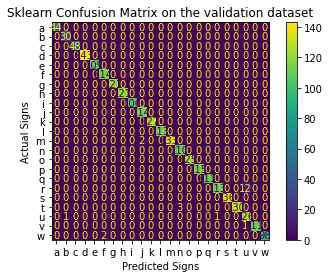

In [204]:
cm_display = ConfusionMatrixDisplay(cm, display_labels=categories)
cm_display.plot()
## Use the Axes attribute 'ax_' to get to the underlying Axes object.
cm_display.ax_.set(
                title='Sklearn Confusion Matrix on the validation dataset', 
                xlabel='Predicted Signs', 
                ylabel='Actual Signs'
)
plt.show()

In [205]:
model.save('mediapipe.h5')     # Saving the model